# Exercise Set 5

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
sns.set()

In [2]:
#load data in data_5
data1 = np.loadtxt("Data_5/0.2.txt")
data2 = np.loadtxt("Data_5/0.5.txt")
data3 = np.loadtxt("Data_5/0.8.txt")

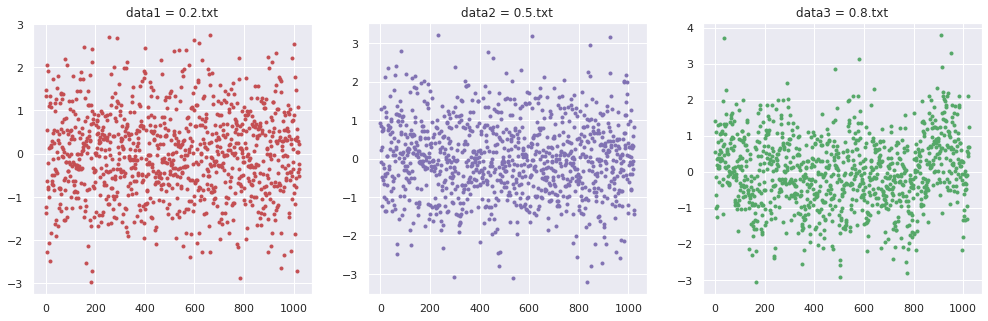

In [3]:
#plot the data
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].plot(data1, "r.")
axs[0].set_title("data1 = 0.2.txt")

axs[1].plot(data2, "m.")
axs[1].set_title("data2 = 0.5.txt")

axs[2].plot(data3, "g.")
axs[2].set_title("data3 = 0.8.txt")

plt.show()

# Q1:

In [4]:
n_m = [1, 2, 3, 4, 5, 10]
n_k = [1, 2, 3, 4, 5, 6, 10]

In [5]:
def moment(x,k):
    """calculate kth central moment of x data

    Args:
        x (array_like): data
        k (int): order of central moment

    Returns:
        float: k-th central moment
    """
    return np.mean((x)**k)

In [62]:
def cumulant(x, k, M):  
    """calculate kth cumulant of x data

    Args:
        x (array_like): data
        k (int): order of cumulant

    Returns:
        float: k-th cumulant
    """
    K = np.zeros((k,k))
    for n in range(1,k+1):
        K[n-1, 0] = M(x,n) 
        for i in range(1, n):
            K[n-1, i] = comb(n-1, n-i) * M(x,n-i)
        if n != k:
            K[n-1, n] = 1

    return  ((-1)**(k-1)) * np.linalg.det(K)



In [18]:
Moment1, Moment2, Moment3 = [], [], []
for n in n_m:
    Moment1.append(moment(data1, n))
    Moment2.append(moment(data2, n))
    Moment3.append(moment(data3, n))

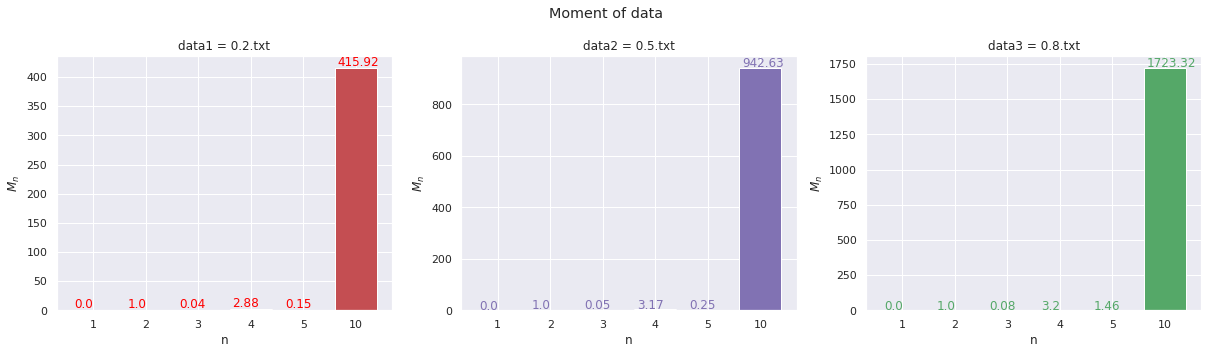

In [106]:
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].bar([str(i) for i in n_m], Moment1, color="r")
axs[0].set_title("data1 = 0.2.txt")
axs[0].set_xlabel("n")
axs[0].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment1):
    axs[0].text(i-.35,v+4, str(round(v,2)), color='red')

axs[1].bar([str(i) for i in n_m], Moment2, color="m")
axs[1].set_title("data2 = 0.5.txt")
axs[1].set_xlabel("n")
axs[1].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment2):
    axs[1].text(i-.35,v+4, str(round(v,2)), color='m')

axs[2].bar([str(i) for i in n_m], Moment3, color="g")
axs[2].set_title("data3 = 0.8.txt")
axs[2].set_xlabel("n")
axs[2].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment3):
    axs[2].text(i-.35,v+4, str(round(v,2)), color='g')

fig.suptitle("Moment of data")
plt.tight_layout()
plt.show()

In [63]:
Cumulant1, Cumulant2, Cumulant3 = [], [], []
for n in n_k:
    Cumulant1.append(cumulant(data1, n, moment))
    Cumulant2.append(cumulant(data2, n, moment))
    Cumulant3.append(cumulant(data3, n, moment))

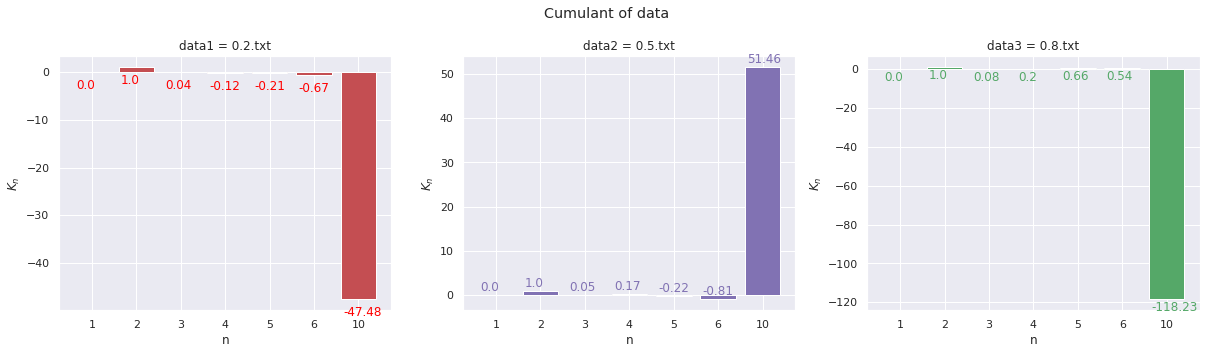

In [116]:
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].bar([str(i) for i in n_k], Cumulant1, color="r")
axs[0].set_title("data1 = 0.2.txt")
axs[0].set_xlabel("n")
axs[0].set_ylabel(r"$K_n$")

for i, v in enumerate(Cumulant1):
    axs[0].text(i-.35,v-3.5, str(round(v,2)), color='red')
    
axs[1].bar([str(i) for i in n_k], Cumulant2, color="m")
axs[1].set_title("data2 = 0.5.txt")
axs[1].set_xlabel("n")
axs[1].set_ylabel(r"$K_n$")
for i, v in enumerate(Cumulant2):
    axs[1].text(i-.35,v+1, str(round(v,2)), color='m')

axs[2].bar([str(i) for i in n_k], Cumulant3, color="g")
axs[2].set_title("data3 = 0.8.txt")
axs[2].set_xlabel("n")
axs[2].set_ylabel(r"$K_n$")
for i, v in enumerate(Cumulant3):
    axs[2].text(i-.35,v-6, str(round(v,2)), color='g')

fig.suptitle("Cumulant of data")
plt.tight_layout()
plt.show()

# Q2:

In [129]:
def skewness(x):
    """calculate skewness of data

    Args:
        x (array_like): data

    Returns:
        float: skewness of data
    """
    return np.mean((x-x.mean())**3)

In [130]:
def kurtosis(x):
    """calculate kurtosis of data

    Args:
        x (array_like): data

    Returns:
        float: kurtosis of data
    """
    m1 = x.mean()
    m2 = np.mean(x**2)
    m3 = np.mean(x**3)
    m4 = np.mean(x**4)
    kurt = m4 - 4* m3*m1 - 3 * m2**2 + 12 * m2 * m1 - 6* m1**4
    return kurt

In [138]:
print("The skewness of data 1 is", skewness(data1))
print("The skewness of data 2 is", skewness(data2))
print("The skewness of data 3 is", skewness(data3))

The skewness of data 1 is 0.03562410826680136
The skewness of data 2 is 0.04754127376432882
The skewness of data 3 is 0.08001875525507664


In [139]:
print("The kurtosis of data 1 is", kurtosis(data1))
print("The kurtosis of data 2 is", kurtosis(data2))
print("The kurtosis of data 3 is", kurtosis(data3))

The kurtosis of data 1 is -0.11911202437002512
The kurtosis of data 2 is 0.16745108121629032
The kurtosis of data 3 is 0.20486966786337443


# Q3:

# Q4:

In [132]:
def GenerateNormal():
  """generate normal distribution from unifor with BoX Muller algorithm

  Returns:
      float: random variable with normal distiribution
  """
  u1, u2 = np.random.uniform(0, 1, 2)
  z1 = ((-2*np.log(u1))**(0.5))* np.cos(2*np.pi*u2)
  z2 = ((-2*np.log(u2))**(0.5))* np.sin(2*np.pi*u1)
  return z1,z2

In [119]:
normal = []
for i in range(1000):
  z1,z2 = GenerateNormal()
  normal.append(z1)
  normal.append(z2)

In [134]:
#tranfor normal dist, to guassian dist. with the mean is 3 and the variance is 2
guassian = np.array(normal)* np.sqrt(2) + 3

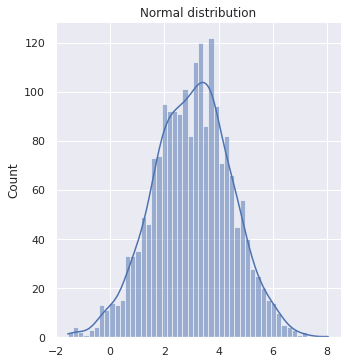

In [135]:
sns.displot(guassian, kde=True, bins= 50)
plt.title('Normal distribution')
plt.show()

In [128]:
guassian.mean()

3.0327041693402443

In [129]:
guassian.var()

2.0400336336624187